<a href="https://colab.research.google.com/github/sudhirJain/Colab-Research/blob/master/Introduction_to_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# The following is used to install the new version of tensorflow version 2.2.0
!pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc2)


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0-rc2'

In [0]:
# Checking GPU avaliablet
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [0]:
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers, models
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_data.shape

(60000, 28, 28)

In [0]:
test_data.shape

(10000, 28, 28)

In [0]:
train_images = train_data.reshape((60000,28*28)).astype('float32') / 255
test_images = test_data.reshape((10000,28*28)).astype('float32') / 255

In [0]:
train_images.shape

(60000, 784)

In [0]:
test_images.shape

(10000, 784)

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))


In [0]:
model.summary() # Bias is also added to it

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
model_history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2892 - acc: 0.9179
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1274 - acc: 0.9622
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0873 - acc: 0.9743
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0659 - acc: 0.9807
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0517 - acc: 0.9847


In [0]:
epochs = range(5)
train_acc = model.history.history['acc']
train_loss = model.history.history['loss']

No handles with labels found to put in legend.


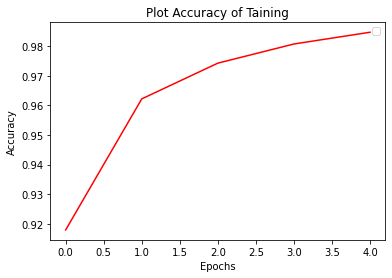

In [0]:
plt.plot(epochs, train_acc,'r')
plt.title('Plot Accuracy of Taining')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

No handles with labels found to put in legend.


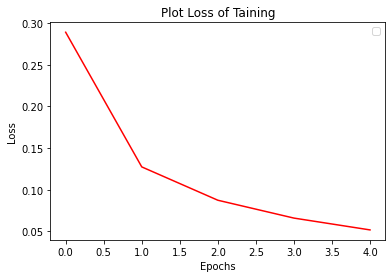

In [0]:
plt.plot(epochs, train_loss,'r')
plt.title('Plot Loss of Taining')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [0]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - acc: 0.9750


In [0]:
test_loss

0.07846779376268387

In [0]:
test_accuracy

0.9750000238418579

Tensor Flow Basics

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0-rc2'

In [0]:
# pip install torch

In [0]:
import numpy as np

In [0]:
import torch

In [0]:
x = torch.Tensor(4,5)

In [0]:
x.type

<function Tensor.type>

In [0]:
y = torch.Size([3,4])

In [0]:
z = torch.zeros(3,4)

In [0]:
# Tensor operations

In [0]:
x = torch.Tensor(3,4)

In [0]:
y = torch.Tensor(3,4)

In [0]:
x + y

tensor([[2.5516e-03, 0.0000e+00, 8.9683e-44, 0.0000e+00],
        [       nan, 0.0000e+00, 1.2966e-09, 1.6605e-09],
        [3.5323e-04, 8.3996e-08, 2.6622e+22, 5.3107e-06]])

In [0]:
x = x.sum(dim=0)

In [0]:
x

tensor([       nan, 4.1998e-08, 1.3311e+22, 2.6562e-06])

In [0]:
# AutoGrad and Gradients

In [0]:
x = torch.rand(3,3, requires_grad=True)

In [0]:
x

tensor([[0.2782, 0.2206, 0.9308],
        [0.5963, 0.8187, 0.0310],
        [0.6678, 0.4071, 0.4855]], requires_grad=True)

In [0]:
y = x**3 + 7

In [0]:
y

tensor([[7.0215, 7.0107, 7.8064],
        [7.2121, 7.5487, 7.0000],
        [7.2979, 7.0675, 7.1144]], grad_fn=<AddBackward0>)

In [0]:
z = y.sum(dim=0)

In [0]:
z = z.sum()

In [0]:
z 

tensor(65.0792, grad_fn=<SumBackward0>)

In [0]:
z.backward()

In [0]:
x.grad

tensor([[0.2322, 0.1460, 2.5991],
        [1.0669, 2.0106, 0.0029],
        [1.3380, 0.4972, 0.7071]])

In [0]:
# !pip install torch torchvision

In [0]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as P
from torchvision import datasets, transforms
from collections import OrderedDict

In [0]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0,5],[0.5])])


In [0]:
mnist_train_dataset = datasets.MNIST('mnist_train_dataset', download=True, train=True, transform=transform)

Extracting mnist_train_dataset/MNIST/raw/train-images-idx3-ubyte.gz to mnist_train_dataset/MNIST/raw


Extracting mnist_train_dataset/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_train_dataset/MNIST/raw




Extracting mnist_train_dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_train_dataset/MNIST/raw


Extracting mnist_train_dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_train_dataset/MNIST/raw
Processing...
Done!


In [0]:
mnist_train_data_loader = torch.utils.data.DataLoader(mnist_train_dataset, batch_size=64, shuffle=True) # creating data loader

##**Check Sample MNIST images**




In [0]:
train_dataset_iterator = iter(mnist_train_data_loader)

In [0]:
train_images, train_labels = train_dataset_iterator.next()

In [0]:
train_images.shape # 1 means it is gray scacle value

torch.Size([64, 1, 28, 28])

In [0]:
train_labels # Shoqing the images of the pictures

tensor([6, 9, 9, 8, 0, 0, 5, 1, 2, 8, 1, 8, 2, 0, 8, 3, 4, 7, 4, 1, 7, 1, 5, 6,
        5, 8, 0, 2, 2, 0, 3, 9, 5, 4, 0, 9, 7, 1, 2, 1, 1, 1, 5, 1, 0, 6, 2, 3,
        1, 3, 1, 7, 9, 8, 3, 0, 1, 7, 3, 5, 1, 6, 4, 7])

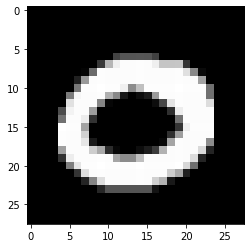

In [0]:
plt.imshow(train_images[4].numpy().squeeze(), cmap='gray')

In [0]:
import torch.nn as nn
import torch.nn.functional as F

# Build Simple Neural Network

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    # Defining the neural network layers
    self.hidden_layer = nn.Linear(784, 256)

    # output layer units - one for each layer

    self.output_layer = nn.Linear(256, 10)

  def forward(self, x):
    # Pass the input tensor through each of our operations
    # Hidden lauer with relu activation

    x = F.relu(self.hidden_layer(x))

    # output with the softmax activation
    x = F.softmax(self.output_layer(x), dim=1)

    return x


In [0]:
model = NeuralNetwork()

In [0]:
model.hidden_layer

Linear(in_features=784, out_features=256, bias=True)

In [0]:
  model.hidden_layer.weight.data

tensor([[ 0.0022,  0.0200, -0.0313,  ...,  0.0320, -0.0125, -0.0137],
        [ 0.0348, -0.0178,  0.0063,  ...,  0.0276, -0.0123, -0.0238],
        [ 0.0198,  0.0167, -0.0080,  ..., -0.0271, -0.0094, -0.0129],
        ...,
        [ 0.0346,  0.0269,  0.0023,  ..., -0.0187, -0.0209,  0.0211],
        [-0.0333, -0.0192,  0.0049,  ..., -0.0136,  0.0210,  0.0294],
        [-0.0142, -0.0286, -0.0151,  ...,  0.0057, -0.0209, -0.0290]])

In [0]:
model.hidden_layer.bias

Parameter containing:
tensor([-0.0341,  0.0321,  0.0294, -0.0216, -0.0087,  0.0103, -0.0068, -0.0186,
         0.0300, -0.0093, -0.0047, -0.0124,  0.0152,  0.0320,  0.0177,  0.0295,
        -0.0201,  0.0050,  0.0022,  0.0239,  0.0231, -0.0214,  0.0337,  0.0191,
        -0.0217, -0.0159,  0.0185,  0.0229, -0.0070,  0.0142, -0.0173, -0.0108,
         0.0263,  0.0231,  0.0150, -0.0177, -0.0071, -0.0248, -0.0191, -0.0129,
         0.0045, -0.0044,  0.0353,  0.0304, -0.0177, -0.0124,  0.0163,  0.0154,
         0.0210,  0.0194,  0.0147,  0.0103, -0.0045, -0.0074, -0.0318,  0.0127,
         0.0047, -0.0213,  0.0116, -0.0343,  0.0179,  0.0212,  0.0020,  0.0338,
         0.0222, -0.0073, -0.0116, -0.0304, -0.0295, -0.0162,  0.0149, -0.0348,
        -0.0297, -0.0053,  0.0269,  0.0048,  0.0191, -0.0122,  0.0257, -0.0101,
         0.0305,  0.0316,  0.0190,  0.0351,  0.0066,  0.0044,  0.0149, -0.0236,
        -0.0091,  0.0077,  0.0139,  0.0200,  0.0098,  0.0008, -0.0043,  0.0307,
         0.0112, -

##**Define Loss Function**


In [0]:
criterion = nn.CrossEntropyLoss()

##**Calculating the loss for single image**

In [0]:
train_images.shape

torch.Size([64, 1, 28, 28])

In [0]:
train_images_batch = train_images.view(train_images.shape[0],-1)

In [0]:
train_images_batch.shape

torch.Size([64, 784])

In [0]:
train_images_batch = train_images.view(train_images.shape[0], -1) 

In [0]:
train_images_batch.shape

torch.Size([64, 784])

In [0]:
output_predictions = model(train_images_batch)

In [0]:
loss = criterion(output_predictions, train_labels)

In [0]:
loss

tensor(2.3001, grad_fn=<NllLossBackward>)

##**Train the Network**

In [0]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

##**Training using the train images**

In [0]:
epochs = 8
for e in range(epochs):
  training_loss = 0
  for train_images, train_labels in mnist_train_data_loader:
    # Flatten train_images batch
    images = train_images.view(train_images.shape[0],-1)
    # Make the gradient values to zero
    optimizer.zero_grad()
    # get out predictions from the images
    output_predictions = model(images)
    #calculate loss
    loss = criterion(output_predictions,train_labels)
    # Do backward to find the gradients
    loss.backward()
    #update the weights of the parameters
    optimizer.step()
    training_loss += loss.item()
  else:
    print (f"training loss for epoch - {e} {training_loss/len(mnist_train_data_loader)}")


training loss for epoch - 0 2.158570678122262
training loss for epoch - 1 1.8622147311279769
training loss for epoch - 2 1.7554249950309297
training loss for epoch - 3 1.6937631728298375
training loss for epoch - 4 1.6691004791493609
training loss for epoch - 5 1.6568279340068923
training loss for epoch - 6 1.6470590462562626
training loss for epoch - 7 1.6122722560917135


###**Inference on a digit**

In [0]:
images, labels = next(iter(mnist_train_data_loader))

In [0]:
infer_img = images[0].view(1, 784)

In [0]:
with torch.no_grad():
  output_prediction = model(infer_img)

In [0]:
output_prediction.shape

torch.Size([1, 10])

In [0]:
probabilities = output_prediction.data.numpy().squeeze()

In [0]:
probabilities.shape

(10,)

In [0]:
probabilities # 1 is having the largest probability

array([9.9712902e-01, 4.5845177e-12, 7.0339942e-05, 2.9743527e-05,
       1.7471380e-11, 2.7687794e-03, 1.7843725e-07, 8.4279272e-08,
       1.8002164e-06, 2.6165829e-08], dtype=float32)

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:362: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


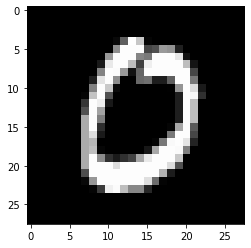

In [0]:
plt.imshow(infer_img.resize(1,28,28).numpy().squeeze(), cmap='gray')